<h1><center> EDA of Rossmann Store Sales Dataset <center/></h1>

<div 
style="background-color:powderblue;">
&nbsp;
</div>

# Introduction

The following Notebook covers the Exploratory Data Analysis of the Rossmann Store Sales Dataset. After the exploration we will attempt to provide some basic insights into the productivity of the workers and their relationship to some of the vatriables presented. 

>**Data Set Information:** 
Rossmann operates over 3,000 drug stores in 7 European countries. Currently, Rossmann store managers are tasked with predicting their daily sales for up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied. - Kaggle Overview


The datasets are obtained from Kaggle. They can be downloaded from : [https://www.kaggle.com/competitions/rossmann-store-sales/data](https://www.kaggle.com/competitions/rossmann-store-sales/data)

<div 
style="background-color:powderblue;">
&nbsp;
</div>

# Ethical Considerations

1. Does this analysis break privacy of the competitors of Rossmann stores?
2. Can people's personal information of the drug buyers be identified in the dataset?
3. Do we need consent from all parties: customers and competitors?
4. Can we be confident about the truth of the dataset?
5. Are all data from the Rossmann stores enough for the analysis?
6. Are the intentions of the analysis good?

<div 
style="background-color:powderblue;">
&nbsp;
</div>

# Variable Explanation

* **Id** - an Id that represents a (Store, Date) duple within the test set
* **Store** - a unique Id for each store
* **Sales** - the turnover for any given day (this is what you are predicting)
* **Customers** - the number of customers on a given day
* **Open** - an indicator for whether the store was open: 0 = closed, 1 = open
* **StateHoliday** - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None
* **SchoolHoliday** - indicates if the (Store, Date) was affected by the closure of public schools
* **StoreType** - differentiates between 4 different store models: a, b, c, d
* **Assortment** - describes an assortment level: a = basic, b = extra, c = extended
* **CompetitionDistance** - distance in meters to the nearest competitor store
* **CompetitionOpenSince[Month/Year]** - gives the approximate year and month of the time the nearest competitor was opened
* **Promo** - indicates whether a store is running a promo on that day
* **Promo2** - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating
* **Promo2Since[Year/Week]** - describes the year and calendar week when the store started participating in Promo2
* **PromoInterval** - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store

<div 
style="background-color:powderblue;">
&nbsp;
</div>

# Data Input

In [1]:
# Import all libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
pd.set_option('display.max_columns', None)

In [2]:
# Read train.csv and view the data
train = pd.read_csv("train.csv", low_memory=False)
train

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1


In [3]:
# Read the store.csv and view the data
store = pd.read_csv("store.csv", low_memory=False)
store

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


<div 
style="background-color:powderblue;">
&nbsp;
</div>

# Data Summary 

In this section we will investigate the data types of the variables available and describe the form of the data including the the shape and size.We will also be able to identify any missing values. 

## Shape, size and dtypes

In [4]:
# Find out the size of the dataframes
print(train.size)
print(store.size)

9154881
11150


In [5]:
# Find out the shape of the dataframes
print(train.shape)
print(store.shape)

(1017209, 9)
(1115, 10)


## Info

In [6]:
# View general info of the dataframe train
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In the train's dataframe, there are 9 columns named Store, DayOfWeek, Date, Sales, Customers, Open, Promo, StateHoliday, SchoolHoliday. The datatypes of most of the columns are integer (7 columns) except two being object (Date and StateHoliday). There are 1017209 rows in the table and no null values in each row.

In [7]:
# View general info of the dataframe store
store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In the store's dataframe, there are 10 columns named Store, StoreType, Assortment, CompetitionDistance, CompetitionOpenSinceMonth, CompetitionOpenSinceYear, Promo2, Promo2SinceWeek, Promo2SinceYear and PromoInterval. 5 columns are float, 2 columns are integer and 3 columns are object. There are 1115 rows in the table and 6 columns have null values.

<div 
style="background-color:powderblue;">
&nbsp;
</div>

# Data preparation: Cleaning and Wrangling

## Merging of data sources

In [8]:
combined = train.merge(store, how = "left", on = "Store", validate = "many_to_one")
combined

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1017205,1112,2,2013-01-01,0,0,0,0,a,1,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1017206,1113,2,2013-01-01,0,0,0,0,a,1,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1017207,1114,2,2013-01-01,0,0,0,0,a,1,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


Noticing that the number of the rows after combining is the same as the row number in the train table. This merged dataframe does not create unnecessary extra rows, it's all good to be analysed.

In [9]:
# Check the info of the new merged dataframe
combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1014567 non-null  float64
 12  CompetitionOpenSinceMonth  693861 non-null   float64
 13  CompetitionO

## Data cleaning - Null Values

The script combined.info() above shows that most columns in the combined dataframe do not have null values;
only 6 columns CompetitionDistance, CompetitionOpenSinceMonth, CompetitionOpenSinceYear, Promo2SinceWeek, Promo2SinceYear and PromoInterval have null values. I will check out how many null values each column has.  

In [10]:
combined[combined["CompetitionDistance"].isna()]

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
290,291,5,2015-07-31,10052,973,1,1,0,1,d,a,NaN,NaN,NaN,0,NaN,NaN,NaN
621,622,5,2015-07-31,6306,540,1,1,0,1,a,c,NaN,NaN,NaN,0,NaN,NaN,NaN
878,879,5,2015-07-31,6000,466,1,1,0,0,d,a,NaN,NaN,NaN,1,5.0,2013.0,"Feb,May,Aug,Nov"
1405,291,4,2015-07-30,9030,883,1,1,0,1,d,a,NaN,NaN,NaN,0,NaN,NaN,NaN
1736,622,4,2015-07-30,5412,406,1,1,0,1,a,c,NaN,NaN,NaN,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1015601,622,3,2013-01-02,4080,451,1,0,0,1,a,c,NaN,NaN,NaN,0,NaN,NaN,NaN
1015858,879,3,2013-01-02,3077,326,1,0,0,1,d,a,NaN,NaN,NaN,1,5.0,2013.0,"Feb,May,Aug,Nov"
1016385,291,2,2013-01-01,0,0,0,0,a,1,d,a,NaN,NaN,NaN,0,NaN,NaN,NaN
1016716,622,2,2013-01-01,0,0,0,0,a,1,a,c,NaN,NaN,NaN,0,NaN,NaN,NaN


There are 2642 rows of null values in the CompetitionDistance column.

In [11]:
combined[combined["CompetitionOpenSinceMonth"].isna()]

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
11,12,5,2015-07-31,8959,962,1,1,0,1,a,c,1070.0,NaN,NaN,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
12,13,5,2015-07-31,8821,568,1,1,0,0,d,a,310.0,NaN,NaN,1,45.0,2009.0,"Feb,May,Aug,Nov"
15,16,5,2015-07-31,10231,979,1,1,0,1,a,c,3270.0,NaN,NaN,0,NaN,NaN,NaN
18,19,5,2015-07-31,8234,718,1,1,0,1,a,c,3240.0,NaN,NaN,1,22.0,2011.0,"Mar,Jun,Sept,Dec"
21,22,5,2015-07-31,6566,633,1,1,0,0,a,a,1040.0,NaN,NaN,1,22.0,2012.0,"Jan,Apr,Jul,Oct"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017189,1096,2,2013-01-01,0,0,0,0,a,1,a,c,1130.0,NaN,NaN,1,10.0,2014.0,"Mar,Jun,Sept,Dec"
1017193,1100,2,2013-01-01,0,0,0,0,a,1,a,a,540.0,NaN,NaN,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
1017206,1113,2,2013-01-01,0,0,0,0,a,1,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1017207,1114,2,2013-01-01,0,0,0,0,a,1,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [12]:
combined[combined["CompetitionOpenSinceYear"].isna()]

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
11,12,5,2015-07-31,8959,962,1,1,0,1,a,c,1070.0,NaN,NaN,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
12,13,5,2015-07-31,8821,568,1,1,0,0,d,a,310.0,NaN,NaN,1,45.0,2009.0,"Feb,May,Aug,Nov"
15,16,5,2015-07-31,10231,979,1,1,0,1,a,c,3270.0,NaN,NaN,0,NaN,NaN,NaN
18,19,5,2015-07-31,8234,718,1,1,0,1,a,c,3240.0,NaN,NaN,1,22.0,2011.0,"Mar,Jun,Sept,Dec"
21,22,5,2015-07-31,6566,633,1,1,0,0,a,a,1040.0,NaN,NaN,1,22.0,2012.0,"Jan,Apr,Jul,Oct"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017189,1096,2,2013-01-01,0,0,0,0,a,1,a,c,1130.0,NaN,NaN,1,10.0,2014.0,"Mar,Jun,Sept,Dec"
1017193,1100,2,2013-01-01,0,0,0,0,a,1,a,a,540.0,NaN,NaN,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
1017206,1113,2,2013-01-01,0,0,0,0,a,1,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1017207,1114,2,2013-01-01,0,0,0,0,a,1,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


There are 323348 rows of missing values in the two columns CompetitionOpenSinceMonth and CompetitionOpenSinceYear

In [13]:
combined[combined["Promo2SinceWeek"].isna()]

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
5,6,5,2015-07-31,5651,589,1,1,0,1,a,a,310.0,12.0,2013.0,0,NaN,NaN,NaN
6,7,5,2015-07-31,15344,1414,1,1,0,1,a,c,24000.0,4.0,2013.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017201,1108,2,2013-01-01,0,0,0,0,a,1,a,a,540.0,4.0,2004.0,0,NaN,NaN,NaN
1017203,1110,2,2013-01-01,0,0,0,0,a,1,c,c,900.0,9.0,2010.0,0,NaN,NaN,NaN
1017205,1112,2,2013-01-01,0,0,0,0,a,1,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1017206,1113,2,2013-01-01,0,0,0,0,a,1,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN


In [14]:
combined[combined["Promo2SinceYear"].isna()]

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
5,6,5,2015-07-31,5651,589,1,1,0,1,a,a,310.0,12.0,2013.0,0,NaN,NaN,NaN
6,7,5,2015-07-31,15344,1414,1,1,0,1,a,c,24000.0,4.0,2013.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017201,1108,2,2013-01-01,0,0,0,0,a,1,a,a,540.0,4.0,2004.0,0,NaN,NaN,NaN
1017203,1110,2,2013-01-01,0,0,0,0,a,1,c,c,900.0,9.0,2010.0,0,NaN,NaN,NaN
1017205,1112,2,2013-01-01,0,0,0,0,a,1,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1017206,1113,2,2013-01-01,0,0,0,0,a,1,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN


There are 508031 rows of missing values in the three columns Promo2SinceWeek, Promo2SinceYear and PromoInterval.

## Data cleaning - Duplicated value

Check if there are any duplicated values of the combine store and date

In [15]:
duplicated = combined.duplicated(subset = ["Store","Date"], keep = 'first')
duplicated.value_counts()

False    1017209
dtype: int64

All rows are not duplicated, therefore, I do not need to delete any rows

Noticing that there are some rows that have 0 sales, I would like to create a new data frame that excluding them for my future analysis.

In [16]:
# Filter the data to eliminate the zero sales figures.
excluded_zero = combined[combined["Sales"] !=0]
excluded_zero

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1016776,682,2,2013-01-01,3375,566,1,0,a,1,b,a,150.0,9.0,2006.0,0,NaN,NaN,NaN
1016827,733,2,2013-01-01,10765,2377,1,0,a,1,b,b,860.0,10.0,1999.0,0,NaN,NaN,NaN
1016863,769,2,2013-01-01,5035,1248,1,0,a,1,b,b,840.0,NaN,NaN,1,48.0,2012.0,"Jan,Apr,Jul,Oct"
1017042,948,2,2013-01-01,4491,1039,1,0,a,1,b,b,1430.0,NaN,NaN,0,NaN,NaN,NaN


I can see that the number of rows reduces from 1017209 to 844338 rows (172,871 rows have sales of 0)

In [17]:
# Find out the stores/days that closed due to State Holiday
closed_days = combined.loc[(combined["StateHoliday"] != "0") & (combined["Open"] !=1)]
closed_days

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
63555,1,4,2015-06-04,0,0,0,1,a,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
63557,3,4,2015-06-04,0,0,0,1,a,0,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
63563,9,4,2015-06-04,0,0,0,1,a,0,a,c,2030.0,8.0,2000.0,0,NaN,NaN,NaN
63567,13,4,2015-06-04,0,0,0,1,a,1,d,a,310.0,NaN,NaN,1,45.0,2009.0,"Feb,May,Aug,Nov"
63568,14,4,2015-06-04,0,0,0,1,a,0,a,a,1300.0,3.0,2014.0,1,40.0,2011.0,"Jan,Apr,Jul,Oct"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1017205,1112,2,2013-01-01,0,0,0,0,a,1,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1017206,1113,2,2013-01-01,0,0,0,0,a,1,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1017207,1114,2,2013-01-01,0,0,0,0,a,1,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [18]:
# Sumarize data of the closed store due to public holiday on a particular date
closed_days["Date"].value_counts()

2013-03-29    1099
2015-04-03    1098
2013-12-25    1098
2014-04-18    1098
2013-01-01    1097
2013-05-01    1097
2014-01-01    1097
2013-12-26    1096
2015-05-01    1095
2014-05-01    1095
2013-05-09    1085
2014-05-29    1084
2013-04-01    1084
2014-04-21    1083
2015-05-14    1083
2015-04-06    1083
2015-05-25    1082
2013-05-20    1082
2014-06-09    1081
2013-10-03    1075
2015-01-01    1061
2014-12-25     919
2014-12-26     916
2014-10-03     896
2014-06-19     681
2013-05-30     681
2015-06-04     679
2013-11-01     572
2014-11-01     393
2013-01-06     307
2014-01-06     306
2015-01-06     306
2013-10-31     164
2014-10-31     163
2013-08-15     154
2013-11-20      75
2014-11-19      75
Name: Date, dtype: int64

I would like to drop the rows indicating that the stores are closed because the sales analysis especially mean figure won't be accurate if we count the stores that did not open for business on those days.

## Datetime

We can convert the date column to DateTime using the date format '%m/%d/%Y'.

In [19]:
# Change the date type from object to datetime. This step is important to analyse sales in a period of time
formatted_dates = pd.to_datetime(combined["Date"])
formatted_dates

0         2015-07-31
1         2015-07-31
2         2015-07-31
3         2015-07-31
4         2015-07-31
             ...    
1017204   2013-01-01
1017205   2013-01-01
1017206   2013-01-01
1017207   2013-01-01
1017208   2013-01-01
Name: Date, Length: 1017209, dtype: datetime64[ns]

The date column has now changed the value to datetime. The row number stays the same as 1017209 indicating all rows have been updated

In [20]:
# Replace the original date column with the new values and check the datatype to make sure that the date has been changed correctly
combined["Date"] = formatted_dates
combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   Store                      1017209 non-null  int64         
 1   DayOfWeek                  1017209 non-null  int64         
 2   Date                       1017209 non-null  datetime64[ns]
 3   Sales                      1017209 non-null  int64         
 4   Customers                  1017209 non-null  int64         
 5   Open                       1017209 non-null  int64         
 6   Promo                      1017209 non-null  int64         
 7   StateHoliday               1017209 non-null  object        
 8   SchoolHoliday              1017209 non-null  int64         
 9   StoreType                  1017209 non-null  object        
 10  Assortment                 1017209 non-null  object        
 11  CompetitionDistance        1014567 no

In [21]:
# View the dataframe 
combined

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1017205,1112,2,2013-01-01,0,0,0,0,a,1,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1017206,1113,2,2013-01-01,0,0,0,0,a,1,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1017207,1114,2,2013-01-01,0,0,0,0,a,1,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [22]:
# Added three columns Day, Month, and Year for further sales analysis
combined["Day"] = combined["Date"].dt.day_name()
combined["Month"] = combined["Date"].dt.month_name()
combined["Year"] = combined["Date"].dt.year
combined

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Day,Month,Year
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,Friday,July,2015
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",Friday,July,2015
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",Friday,July,2015
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN,Friday,July,2015
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN,Friday,July,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct",Tuesday,January,2013
1017205,1112,2,2013-01-01,0,0,0,0,a,1,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN,Tuesday,January,2013
1017206,1113,2,2013-01-01,0,0,0,0,a,1,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN,Tuesday,January,2013
1017207,1114,2,2013-01-01,0,0,0,0,a,1,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN,Tuesday,January,2013


In [23]:
# Filter data to show the sales figure in a particular day
combined.loc[(combined["Month"] == "October") & (combined["Year"] == 2014) & (combined["Day"] == "Monday")]

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Day,Month,Year
297155,1,1,2014-10-27,4260,475,1,0,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,Monday,October,2014
297156,2,1,2014-10-27,4296,573,1,0,0,0,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",Monday,October,2014
297157,3,1,2014-10-27,4848,684,1,0,0,0,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",Monday,October,2014
297158,4,1,2014-10-27,9172,1286,1,0,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN,Monday,October,2014
297159,5,1,2014-10-27,3687,491,1,0,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN,Monday,October,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317720,1111,1,2014-10-06,7386,544,1,1,0,1,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct",Monday,October,2014
317721,1112,1,2014-10-06,13709,1031,1,1,0,1,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN,Monday,October,2014
317722,1113,1,2014-10-06,7947,827,1,1,0,0,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN,Monday,October,2014
317723,1114,1,2014-10-06,23316,3295,1,1,0,0,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN,Monday,October,2014


<div 
style="background-color:powderblue;">
&nbsp;
</div>

# Summary statistics of the data

In [24]:
combined.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,Year
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.014567e+06,693861.000000,693861.000000,1.017209e+06,509178.000000,509178.000000,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01,5.430086e+03,7.222866,2008.690228,5.005638e-01,23.269093,2011.752774,2.013832e+03
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01,7.715324e+03,3.211832,5.992644,4.999999e-01,14.095973,1.662870,7.773960e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+01,1.000000,1900.000000,0.000000e+00,1.000000,2009.000000,2.013000e+03
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00,7.100000e+02,4.000000,2006.000000,0.000000e+00,13.000000,2011.000000,2.013000e+03
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00,2.330000e+03,8.000000,2010.000000,1.000000e+00,22.000000,2012.000000,2.014000e+03
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00,6.890000e+03,10.000000,2013.000000,1.000000e+00,37.000000,2013.000000,2.014000e+03
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00,7.586000e+04,12.000000,2015.000000,1.000000e+00,50.000000,2015.000000,2.015000e+03


In [25]:
combined.skew()

C:\Users\Phong\AppData\Local\Temp\ipykernel_15156\3158812268.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  combined.skew()


Store                       -0.000955
DayOfWeek                    0.001593
Sales                        0.641460
Customers                    1.598650
Open                        -1.758045
Promo                        0.487838
SchoolHoliday                1.677842
CompetitionDistance          2.928534
CompetitionOpenSinceMonth   -0.169862
CompetitionOpenSinceYear    -7.539515
Promo2                      -0.002255
Promo2SinceWeek              0.104528
Promo2SinceYear             -0.120060
Year                         0.300265
dtype: float64

In [26]:
combined.kurtosis()

C:\Users\Phong\AppData\Local\Temp\ipykernel_15156\3630082397.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  combined.kurtosis()


Store                         -1.200524
DayOfWeek                     -1.246873
Sales                          1.778375
Customers                      7.091773
Open                           1.090723
Promo                         -1.762018
SchoolHoliday                  0.815154
CompetitionDistance           13.000022
CompetitionOpenSinceMonth     -1.248357
CompetitionOpenSinceYear     121.934675
Promo2                        -1.999999
Promo2SinceWeek               -1.369929
Promo2SinceYear               -1.040662
Year                          -1.290603
dtype: float64

I can see that there are a number of variables (CompetitionOpenSinceYear, CompetitionDistance and Customers) with a very high positive kurtosis. This indicates the likelihood of heavy tails with outliers that are possibly extreme.  The SchoolHoliday      appears to have a kurtosis close to 0 indicating that there are possibly no outliers or very few. Most of the other variables have  kurtosis less than 0, indicating that these likely have flat tails with fewer and less extreme outliers. 
In terms of skewness, we can see that Open, CompetitionOpenSinceYear are negatively skewed and Customers, SchoolHoliday and CompetitionDistance are positively skewed.                 

With the Sales figure, the min is 0, the max is 41,551.00. The mean of all sales is 5,773.819; the median is 5,744. It has a positive kurtosis indicating that there are some outliers in the column. The sales skewness is positive.

I am interested in investigating a few variables in more detail. They are Sales, CompetitionOpenSinceYear, CompetitionDistance due to possible outliers. For these I will plot their histograms & scatter plots.

## Variable Classification 

- Store                       discrete
- DayOfWeek                   discrete
- Date                        date
- Sales                       continuous
- Customers                   discrete
- Open                        discrete 
- Promo                       discrete
- StateHoliday                ordinal
- SchoolHoliday               discrete
- CompetitionDistance         continuous
- StoreType                   nominal
- Assortment                  ordinal
- CompetitionOpenSinceMonth   continuous
- CompetitionOpenSinceYear    continuous
- Promo2                      discrete
- Promo2SinceWeek             continuous
- Promo2SinceYear             continuous
- PromoInterval               ordinal
- Day                         ordinal
- Month                       ordinal
- Year                        continous

<div 
style="background-color:powderblue;">
&nbsp;
</div>

# Data cleaning and visualisation

## Handling missing values

As noted above, there are 508031 rows of missing values in the three columns Promo2SinceWeek, Promo2SinceYear and PromoInterval. The number of missing value are large and I won't be using them for the further analysis; so I am dropping those columns.

In [27]:
combined = combined.drop(["Promo2SinceWeek", "Promo2SinceYear", "PromoInterval"], axis = 1)

There are 2642 rows of null values in the CompetitionDistance column. Also, 323348 rows have missing values in the two columns CompetitionOpenSinceMonth and CompetitionOpenSinceYear. I will imput  median to the missing values so the summary statistics values won't alter much. If I chose to imput the missing value with 0, it would change the aggregation figures.

In [28]:
combined.loc[combined["CompetitionDistance"].isna(),"CompetitionDistance"] = combined["CompetitionDistance"].median()

In [29]:
combined.loc[combined["CompetitionOpenSinceMonth"].isna(),"CompetitionOpenSinceMonth"] = combined["CompetitionOpenSinceMonth"].median()

In [30]:
combined.loc[combined["CompetitionOpenSinceYear"].isna(),"CompetitionOpenSinceYear"] = combined["CompetitionOpenSinceYear"].median()

I am checking to make sure the above imputation has worked.

In [31]:
combined.isna().sum()

Store                        0
DayOfWeek                    0
Date                         0
Sales                        0
Customers                    0
Open                         0
Promo                        0
StateHoliday                 0
SchoolHoliday                0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Day                          0
Month                        0
Year                         0
dtype: int64

## Handling outliers

As noted above, I am dropping the rows indicating the stores that were close. It won't be accurate to include the ones not offering services in the analysis. With the other stores that have 0 sales but were open, I am keeping them in the analysis.

In [32]:
# Eliminate the stores that were close
open_days = combined.drop((combined.loc[combined["Open"]==0]).index)

In [33]:
open_days

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Day,Month,Year
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,Friday,July,2015
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,Friday,July,2015
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,Friday,July,2015
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,Friday,July,2015
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,Friday,July,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1016776,682,2,2013-01-01,3375,566,1,0,a,1,b,a,150.0,9.0,2006.0,0,Tuesday,January,2013
1016827,733,2,2013-01-01,10765,2377,1,0,a,1,b,b,860.0,10.0,1999.0,0,Tuesday,January,2013
1016863,769,2,2013-01-01,5035,1248,1,0,a,1,b,b,840.0,8.0,2010.0,1,Tuesday,January,2013
1017042,948,2,2013-01-01,4491,1039,1,0,a,1,b,b,1430.0,8.0,2010.0,0,Tuesday,January,2013


Noticing that there were 844392 rows left after dropping closed days from the original number of 1017209 rows. Therefore, 172817 rows were deleted.

From the open_days data, I would like to workout if there were any stores opening but had sales of 0.

In [34]:
still_zero = open_days[open_days["Sales"]==0]
still_zero.shape

(54, 18)

Noticing that there were 54 records that had 0 sales. I will still include them in the analysis because there were costs involved in running stores on those days.

Since there is only value of 1 for Column Open, I will delete this column.

In [35]:
open_days = open_days.drop("Open", axis = 1)

In [36]:
open_days

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Day,Month,Year
0,1,5,2015-07-31,5263,555,1,0,1,c,a,1270.0,9.0,2008.0,0,Friday,July,2015
1,2,5,2015-07-31,6064,625,1,0,1,a,a,570.0,11.0,2007.0,1,Friday,July,2015
2,3,5,2015-07-31,8314,821,1,0,1,a,a,14130.0,12.0,2006.0,1,Friday,July,2015
3,4,5,2015-07-31,13995,1498,1,0,1,c,c,620.0,9.0,2009.0,0,Friday,July,2015
4,5,5,2015-07-31,4822,559,1,0,1,a,a,29910.0,4.0,2015.0,0,Friday,July,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1016776,682,2,2013-01-01,3375,566,0,a,1,b,a,150.0,9.0,2006.0,0,Tuesday,January,2013
1016827,733,2,2013-01-01,10765,2377,0,a,1,b,b,860.0,10.0,1999.0,0,Tuesday,January,2013
1016863,769,2,2013-01-01,5035,1248,0,a,1,b,b,840.0,8.0,2010.0,1,Tuesday,January,2013
1017042,948,2,2013-01-01,4491,1039,0,a,1,b,b,1430.0,8.0,2010.0,0,Tuesday,January,2013


I am using histogram to view Sales data.

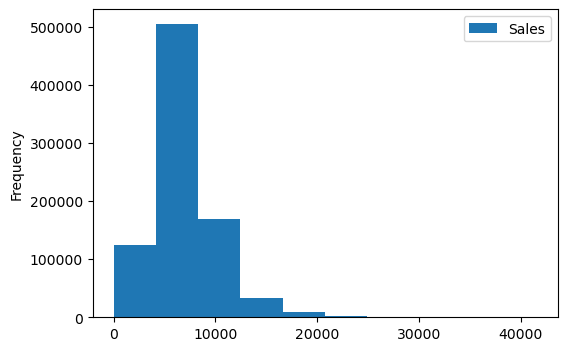

In [37]:
open_days.plot(y=["Sales"],kind="hist", figsize=(6,4))
plt.show()

I using box plots to locate possible outliers of columns Sales, CompetitionDistance and Com.etitionOpenSinceYear.

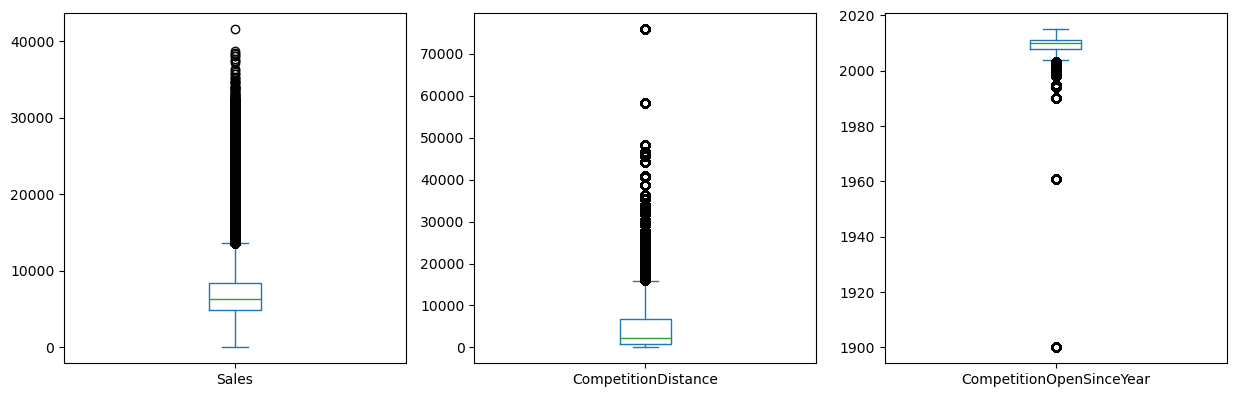

In [38]:
open_days.plot(y=["Sales","CompetitionDistance","CompetitionOpenSinceYear"],
              layout = (2,3), subplots=True, kind="box", figsize=(15,10))
plt.show()

I am creating a function called calculate_outlier in order to find out outliers and treat them.

In [39]:
def calculate_outlier(df,column):
    Q3 = df[column].quantile(0.75)
    Q1 = df[column].quantile(0.25)
    IQR = Q3 - Q1
    lower = Q1 - 1.5*IQR
    upper = Q3 + 1.5*IQR
    return lower, upper

In [40]:
# Applying the function to Sales figures
lower_sales, upper_sales = calculate_outlier(open_days,"Sales")

In [41]:
# Locate the outliers
open_days[(open_days["Sales"]>upper_sales)]

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Day,Month,Year
3,4,5,2015-07-31,13995,1498,1,0,1,c,c,620.0,9.0,2009.0,0,Friday,July,2015
6,7,5,2015-07-31,15344,1414,1,0,1,a,c,24000.0,4.0,2013.0,0,Friday,July,2015
23,24,5,2015-07-31,14190,1082,1,0,1,a,c,4590.0,3.0,2000.0,1,Friday,July,2015
24,25,5,2015-07-31,14180,1586,1,0,1,c,a,430.0,4.0,2003.0,0,Friday,July,2015
83,84,5,2015-07-31,14949,1439,1,0,1,a,c,11810.0,8.0,2014.0,0,Friday,July,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1015796,817,3,2013-01-02,25357,3462,0,0,1,a,a,140.0,3.0,2006.0,0,Wednesday,January,2013
1015821,842,3,2013-01-02,20355,1257,0,0,1,d,c,1200.0,11.0,2007.0,0,Wednesday,January,2013
1016012,1033,3,2013-01-02,13811,1408,0,0,1,a,a,7680.0,3.0,2006.0,0,Wednesday,January,2013
1016093,1114,3,2013-01-02,20642,3401,0,0,1,a,c,870.0,8.0,2010.0,0,Wednesday,January,2013


As there are a big number of outliers in sales (30769 outliers), I am using the capping method which means to impute the upper range values. The other reasons are because these values intended to be high and we wish to limit the influence of the values.

In [42]:
open_days.loc[(open_days["Sales"]>upper_sales),"Sales"] = upper_sales

In [43]:
# Check to see if the imputing has worked
open_days.loc[(open_days["Sales"]>upper_sales)].count()

Store                        0
DayOfWeek                    0
Date                         0
Sales                        0
Customers                    0
Promo                        0
StateHoliday                 0
SchoolHoliday                0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Day                          0
Month                        0
Year                         0
dtype: int64

I am not treating outliers for CompetitionDistance and CompetitionOpenSinceYear as I won't use them for future analysis.

As I will analyse the sales and the effect of promotion, I would like to recheck value_counts() of the Promo columns and confirm if there are any null values.

In [44]:
open_days["Promo"].value_counts()

0    467496
1    376896
Name: Promo, dtype: int64

In [45]:
open_days["Promo"].isna().sum()

0

In [46]:
open_days["Sales"].isna().sum()

0

<div 
style="background-color:powderblue;">
&nbsp;
</div>

# Exploratory insights and visualisation

I chose to answer the below questions.

What is the aggregated sales output when viewed according to months, and what insights can be found regarding the contribution of running a promotion? 
Hint: Start by making the rows your months. The columns should be your promotions, and the values will be your sales. Select an aggregate function.



In [47]:
# I am adding one more column of month number because it helps plot in the order of month.
open_days['Month_number']=open_days['Date'].dt.month

In [48]:
average_sales_by_month_number = pd.pivot_table(open_days, index = "Month_number", values = "Sales", aggfunc = np.mean)
average_sales_by_month_number

,Sales
Month_number,
1,6489.485123
2,6508.356635
3,6860.831007
4,6929.656587
5,6998.191553
6,6877.571225
7,6853.788642
8,6568.330610
9,6464.610052


([<matplotlib.axis.XTick at 0x21ac9251340>,
 [Text(1, 0, 'January'),
  Text(2, 0, 'February'),
  Text(3, 0, 'March'),
  Text(4, 0, 'April'),
  Text(5, 0, 'May'),
  Text(6, 0, 'June'),
  Text(7, 0, 'July'),
  Text(8, 0, 'August'),
  Text(9, 0, 'September'),
  Text(10, 0, 'October'),
  Text(11, 0, 'November'),
  Text(12, 0, 'December')])

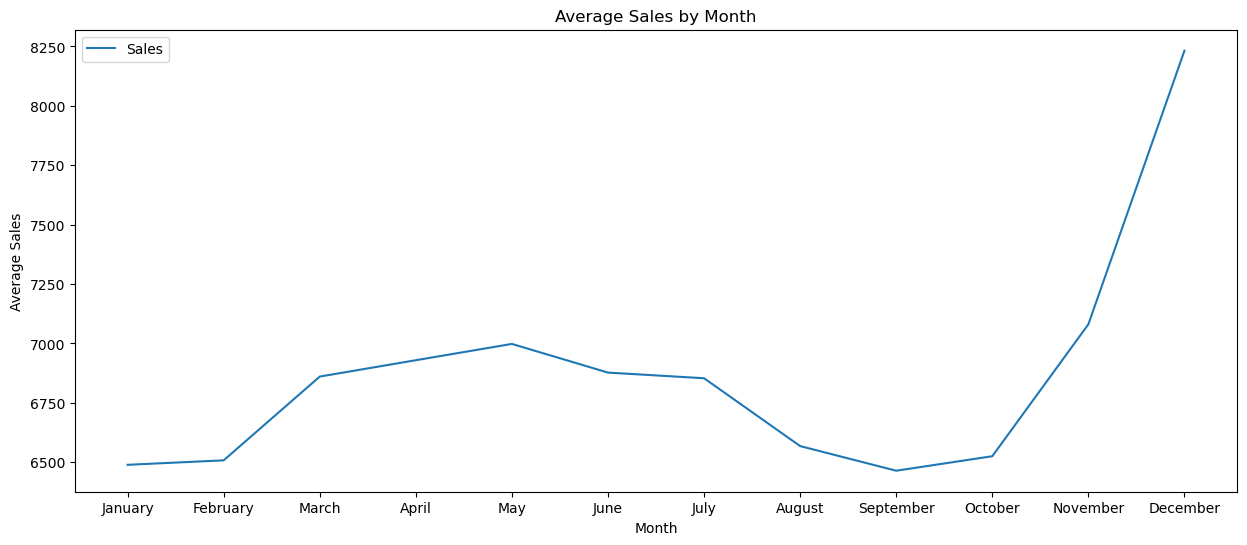

In [49]:
# Plot the line graph showing average sales by month
average_sales_by_month_number.plot(figsize = (15,6))
ticker = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
label = ['January', 'February', 'March', 'April',  'May',  'June', 'July' , 'August', 'September' , 'October', 'November', 'December']
plt.title("Average Sales by Month")
plt.xlabel("Month")
plt.ylabel("Average Sales")
plt.xticks(ticker, label)

Noticing that the average sales peaked in December. It started at a low number in January, singificantlly rose in March from 6508.356635 to 6860.831007 and remained stable until July before a sharp decrease in August by around 3000. In September, the sales was at the bottom before it slightly increased in October and soared in November and December.

I am plotting a bar chart of sales figure by month and promotion.

In [50]:
avg_sales_promo_month= pd.pivot_table(open_days, index = "Month_number", columns = "Promo", values = "Sales", aggfunc = np.mean)

In [51]:
avg_sales_promo_month

Promo,0,1
Month_number,,
1,5555.505922,7661.165909
2,5703.441339,7640.834648
3,5756.760323,8064.759288
4,5803.689694,8234.199694
5,6227.553011,7936.969802
6,5822.435485,8286.348411
7,5711.014841,8095.668780
8,5639.186793,7793.595219
9,5491.010324,7775.285509


([<matplotlib.axis.XTick at 0x21ac92dec40>,
 [Text(0, 0, 'January'),
  Text(1, 0, 'February'),
  Text(2, 0, 'March'),
  Text(3, 0, 'April'),
  Text(4, 0, 'May'),
  Text(5, 0, 'June'),
  Text(6, 0, 'July'),
  Text(7, 0, 'August'),
  Text(8, 0, 'September'),
  Text(9, 0, 'October'),
  Text(10, 0, 'November'),
  Text(11, 0, 'December')])

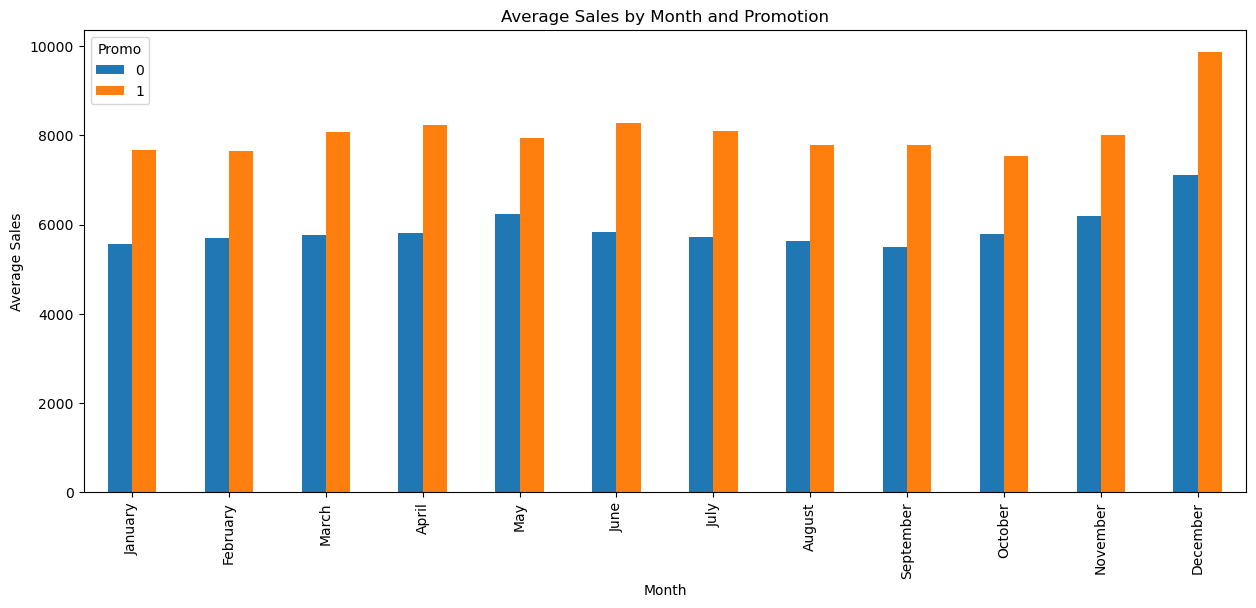

In [52]:
avg_sales_promo_month.plot(kind = "bar", figsize = (15,6))
label = ['January', 'February', 'March', 'April',  'May',  'June', 'July' , 'August', 'September' , 'October', 'November', 'December']
plt.title("Average Sales by Month and Promotion")
plt.xlabel("Month")
plt.ylabel("Average Sales")
plt.xticks(np.arange(len(avg_sales_promo_month)), label)

I can see that the average sales on promotion days are greater than without promotion for all months. Therefore, promotion is likely to boost the sales.

In [53]:
avg_sales_promo_month

Promo,0,1
Month_number,,
1,5555.505922,7661.165909
2,5703.441339,7640.834648
3,5756.760323,8064.759288
4,5803.689694,8234.199694
5,6227.553011,7936.969802
6,5822.435485,8286.348411
7,5711.014841,8095.668780
8,5639.186793,7793.595219
9,5491.010324,7775.285509


Now I would like to figure out how much average sales has increased due to promotion.

In [63]:
# Average sales without promotion
Avg_no_promo = avg_sales_promo_month[0].mean()
Avg_no_promo

5900.180732877678

In [62]:
# Average sales with promotion
Avg_promo = avg_sales_promo_month[1].mean()
Avg_promo

8075.637484879585

In [65]:
# Percentage difference
(Avg_promo - Avg_no_promo)/Avg_promo*100

26.938514217300153

([<matplotlib.axis.XTick at 0x21ad2b9fb80>,
 [Text(1, 0, 'Avg_no_promo'), Text(2, 0, 'Avg_promo')])

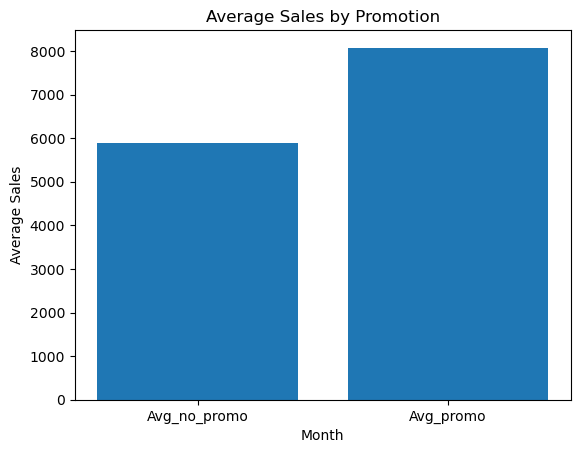

In [80]:
# Draw the chart of the two sales with and without promotion
x = [1,2]
y = [Avg_no_promo, Avg_promo]
bar_labels = ["Avg_no_promo", "Avg_promo"]
plt.bar(x, y)
plt.title("Average Sales by Promotion")
plt.xlabel("Month")
plt.ylabel("Average Sales")
plt.xticks([1,2], bar_labels)

Therefore, the average sales has increased by nearly 27% with a promotion campaign.

<div 
style="background-color:powderblue;">
&nbsp;
</div>

# Conclusion 

The average sales of Rossmann stores fluctuated  monthly during the research period with December witnessing the highest revenue. This is a good indicator for the stores managers to prepare stocks and staff arrangements in the peak time and the other quiet periods. Also, applying promotion will help boost revenue on average about 27%.


<div 
style="background-color:powderblue;">
&nbsp;
</div>

# References 

Monash College Pty Ltd 2019, *Considerations when dealing with missing values and outliers*, e-book, accessed 15 April 2023 from Monash College Moodle Database, <https://www.monashcollege.edu.au/current-students/study-resources/moodle>.

Kaggle.com 2015, *Rossmann Store Sales*, e-book, accessed 10 April 2023, <https://www.kaggle.com/competitions/rossmann-store-sales/data>.